In [33]:
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.metrics import confusion_matrix


In [34]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# ANASTASIA MODEL

## Direct Search Posts

In [35]:
reddit_direct_posts_dir = '/content/gdrive/MyDrive/RelevanceAnalysis/Mask_RedditDirectPosts_analyzed - RedditDirectPosts_analyzed.csv'

reddit_direct_posts = pd.read_csv(reddit_direct_posts_dir)
reddit_direct_posts = reddit_direct_posts.drop(['Unnamed: 0'], axis = 1)

print(reddit_direct_posts.shape)

(5089, 5)


In [36]:
reddit_direct_posts.head()

,content,relevance,RELEVANCE,Checked,Manual Evaluation
0,"html, css and js to react. Hello everyone, I'm...",73764.52.00,0.0,1,0
1,I can only take 7 lives of heracles. What shou...,167654.45.00,0.0,1,0
2,Creating a Shuttle Bus Service in Rural Area N...,160543.49.00,1.0,1,0
3,"http request Event and Standby. Hello,\n\nI wo...",156304.31.00,1.0,1,0
4,/boot/config-$(uname-r). “/boot/config-$(unam...,162374.48.00,1.0,1,0


In [37]:
reddit_direct_posts_checked = reddit_direct_posts[reddit_direct_posts.Checked == 1]
reddit_direct_posts_unchecked = reddit_direct_posts[reddit_direct_posts.Checked == 0]

<Axes: title={'center': 'Percentage of Anastasia Model Relevance Evaluation'}, ylabel='RELEVANCE'>

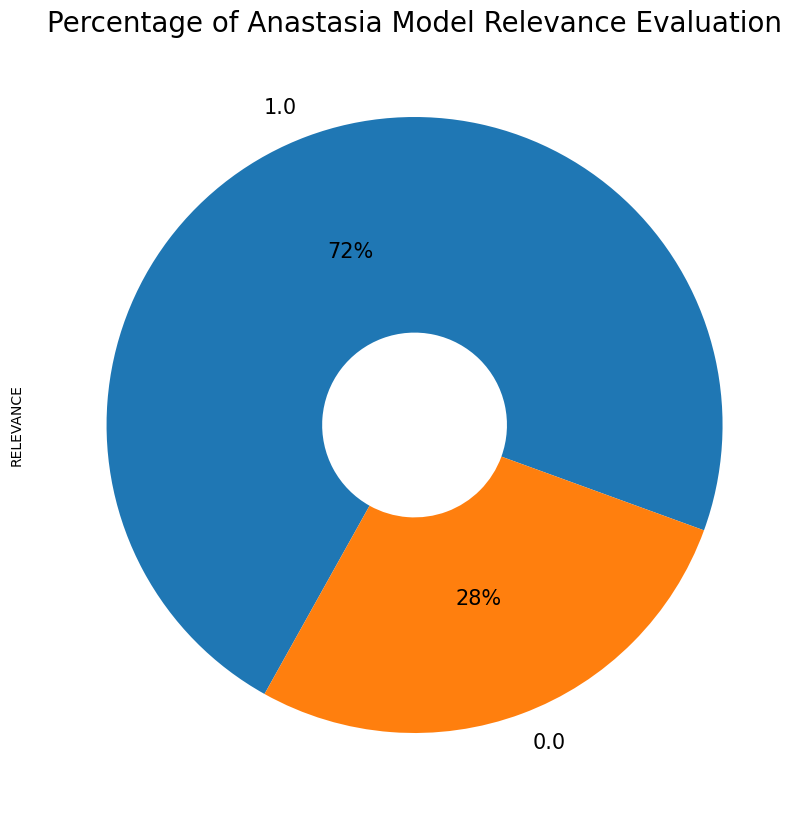

In [38]:
# check the distribution of the labels
plt.figure(figsize=(30,10))
plt.title('Percentage of Anastasia Model Relevance Evaluation', fontsize=20)
reddit_direct_posts_checked.RELEVANCE.value_counts().plot(kind='pie', wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20,  textprops={'fontsize': 15})


<Axes: title={'center': 'Percentage of Manual Relevance Evaluation'}, ylabel='Manual Evaluation'>

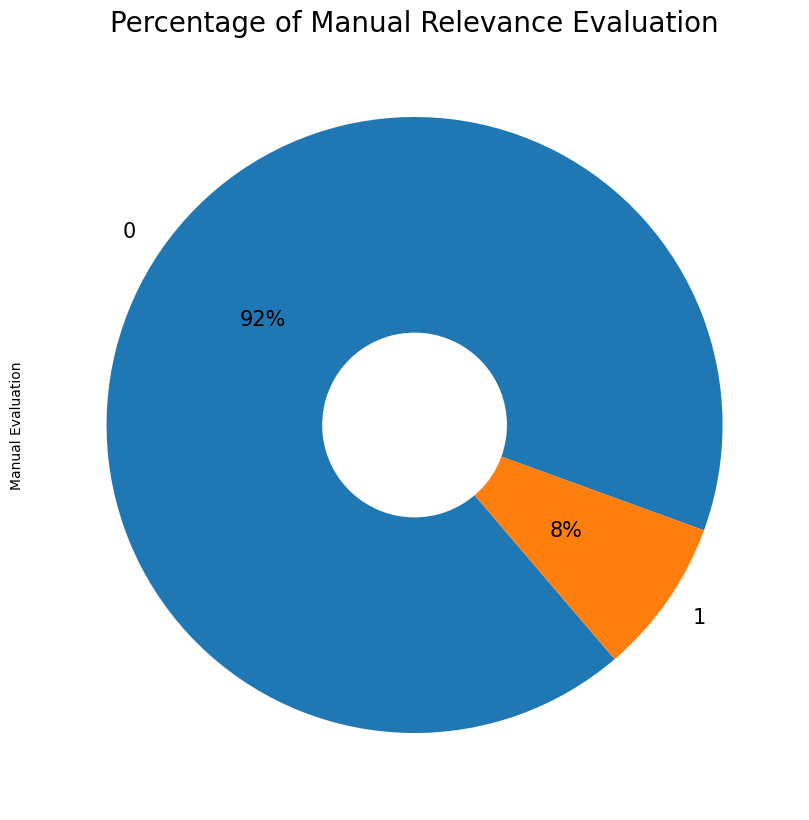

In [39]:
# check the distribution of the labels
plt.figure(figsize=(30,10))
plt.title('Percentage of Manual Relevance Evaluation', fontsize=20)
reddit_direct_posts_checked['Manual Evaluation'].value_counts().plot(kind='pie', wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20,  textprops={'fontsize': 15})


## Filtered Search

In [40]:
reddit_filtered_posts_dir = '/content/gdrive/MyDrive/RelevanceAnalysis/Mask_RedditFilteredPosts_analyzed - RedditFilteredPosts_analyzed.csv'

reddit_filtered_posts = pd.read_csv(reddit_filtered_posts_dir)
reddit_filtered_posts = reddit_filtered_posts.drop(['Unnamed: 0'], axis = 1)

print(reddit_filtered_posts.shape)

(1292, 11)


In [41]:
reddit_filtered_posts_checked = reddit_filtered_posts[reddit_filtered_posts.Checked == 1]
reddit_filtered_posts_unchecked = reddit_filtered_posts[reddit_filtered_posts.Checked == 0]

In [42]:
reddit_filtered_posts_checked.head()

,id,content,created_utc,subreddit,author,keyword,keyword type,relevance,RELEVANCE,Checked,Manual Evaluation
0,149851,My wife's cookies were probably session hijack...,2023-08-30,cybersecurity_help,t3_1658e43,virus,behaviour,1533976.06.00,1.0,1,0
1,151700,HTML Smuggling Leads to Domain Wide Ransomware.,2023-08-28,computerforensics,t3_163jnxz,ransomware,malware type,1645109.45.00,1.0,1,1
2,132502,I need help with a potential virus. I need hel...,2023-09-11,Windows10,t3_16fw3g8,virus,behaviour,1651306.45.00,1.0,1,1
3,164765,"Aura question. I have a question, is Aura a go...",2023-08-14,techsupport,t3_15qhff8,virus,behaviour,155878.53.00,1.0,1,0
4,160988,Need help ruining a scam that uses Google ads ...,2023-08-18,Scams,t3_15u59ys,ddo,malware,1576591.56.00,1.0,1,1


<Axes: title={'center': 'Percentage of Relevance'}, ylabel='RELEVANCE'>

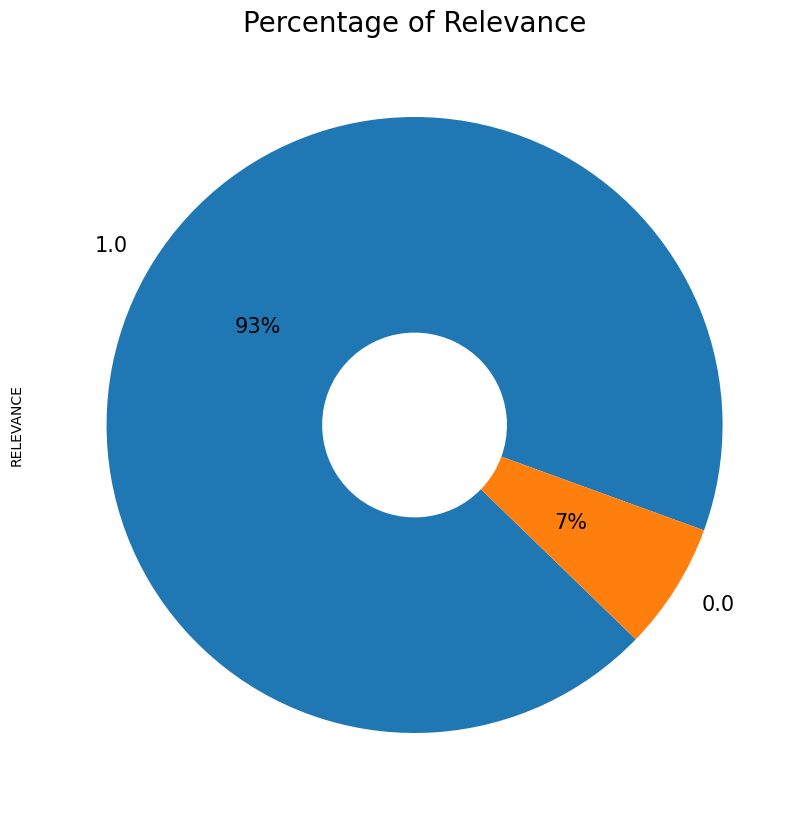

In [43]:
# check the distribution of the labels
plt.figure(figsize=(30,10))
plt.title('Percentage of Relevance', fontsize=20)
reddit_filtered_posts_checked.RELEVANCE.value_counts().plot(kind='pie', wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20,  textprops={'fontsize': 15})


<Axes: title={'center': 'Percentage of Manual Relevance'}, ylabel='Manual Evaluation'>

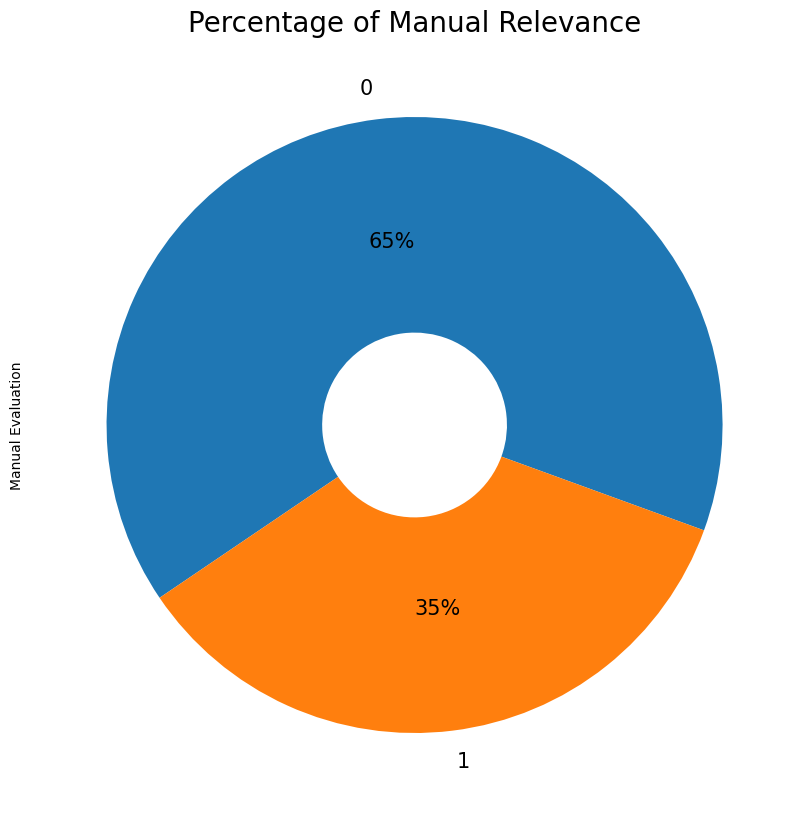

In [44]:
# check the distribution of the labels
plt.figure(figsize=(30,10))
plt.title('Percentage of Manual Relevance', fontsize=20)
reddit_filtered_posts_checked['Manual Evaluation'].value_counts().plot(kind='pie', wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20,  textprops={'fontsize': 15})


## MODEL PERFORMANCE ANALYSIS


#### Filtered Posts

In [45]:
conf_matrix_f = confusion_matrix(reddit_filtered_posts_checked['Manual Evaluation'], reddit_filtered_posts_checked['RELEVANCE'])

# Extract values from confusion matrix
tn_f, fp_f, fn_f, tp_f = conf_matrix_f.ravel()

# Display results
print("Confusion Matrix:")
print(conf_matrix_f)
print("\nFalse Positives (FP):", fp_f)
print("False Negatives (FN):", fn_f)
print("\nTrue Positives (TP):", tp_f)
print("True Negatives (TN):", tn_f)

TP = tp_f
TN = tn_f
FP = fp_f
FN = fn_f

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = (2 * precision * recall) / (precision + recall)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")

Confusion Matrix:
[[ 48 603]
 [ 19 331]]

False Positives (FP): 603
False Negatives (FN): 19

True Positives (TP): 331
True Negatives (TN): 48

Accuracy: 0.3786
Precision: 0.3544
Recall: 0.9457
F1-Score: 0.5156


#### Direct Posts

In [46]:
conf_matrix_d = confusion_matrix(reddit_direct_posts_checked['Manual Evaluation'], reddit_direct_posts_checked['RELEVANCE'])

# Extract values from confusion matrix
tn_d, fp_d, fn_d, tp_d = conf_matrix_d.ravel()

# Display results
print("Confusion Matrix:")
print(conf_matrix_d)
print("\nFalse Positives (FP):", fp_d)
print("False Negatives (FN):", fn_d)
print("\nTrue Positives (TP):", tp_d)
print("True Negatives (TN):", tn_d)

TP = tp_d
TN = tn_d
FP = fp_d
FN = fn_d

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = (2 * precision * recall) / (precision + recall)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")

Confusion Matrix:
[[271 659]
 [  8  75]]

False Positives (FP): 659
False Negatives (FN): 8

True Positives (TP): 75
True Negatives (TN): 271

Accuracy: 0.3416
Precision: 0.1022
Recall: 0.9036
F1-Score: 0.1836


### Joined Analyzed Posts

In [47]:
df = pd.concat([reddit_filtered_posts_checked[['Manual Evaluation', 'RELEVANCE']], reddit_direct_posts_checked[['Manual Evaluation', 'RELEVANCE']]])

In [48]:
conf_matrix = confusion_matrix(df['Manual Evaluation'], df['RELEVANCE'])

# Extract values from confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# Display results
print("Confusion Matrix:")
print(conf_matrix)
print("\nFalse Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("\nTrue Positives (TP):", TP)
print("True Negatives (TN):", TN)

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = (2 * precision * recall) / (precision + recall)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")

Confusion Matrix:
[[ 319 1262]
 [  27  406]]

False Positives (FP): 1262
False Negatives (FN): 27

True Positives (TP): 406
True Negatives (TN): 319

Accuracy: 0.3600
Precision: 0.2434
Recall: 0.9376
F1-Score: 0.3865


# RESULTS MODEL with Reddit Labeled Data


In [49]:
reddit_global_results_dir = '/content/gdrive/MyDrive/RelevanceAnalysis/GlobalResults.csv'

reddit_global_res_posts = pd.read_csv(reddit_global_results_dir)
reddit_global_res_posts = reddit_global_res_posts.drop(['Unnamed: 0'], axis = 1)

print(reddit_global_res_posts.columns)

Index(['full_text', 'Checked', 'Manual Evaluation',
       'relvance unbalanced model', 'RELEVANCE _ UNBALANCED MODEL',
       'relvance balanced model', 'RELEVANCE _ BALANCED MODEL', 'relevance',
       'RELEVANCE NIST MODEL', 'Related'],
      dtype='object')


In [50]:
reddit_global_res_posts = reddit_global_res_posts[['full_text', 'Checked', 'Manual Evaluation', 'relvance unbalanced model',
       'RELEVANCE _ UNBALANCED MODEL', 'relvance balanced model', 'RELEVANCE _ BALANCED MODEL', 'relevance',
       'RELEVANCE NIST MODEL', 'Related']]
reddit_global_res_posts

,full_text,Checked,Manual Evaluation,relvance unbalanced model,RELEVANCE _ UNBALANCED MODEL,relvance balanced model,RELEVANCE _ BALANCED MODEL,relevance,RELEVANCE NIST MODEL,Related
0,How to create a folder of games onto Dock? New...,1,0,605222.55.00,0.0,273471.36.00,0.0,138651.46.00,1.0,0
1,Never seen something like this; VM is refreshi...,1,1,879809.06.00,0.0,871218.03.00,0.0,162825.09.00,1.0,0
2,Kani: A Lightweight Highly Hackable Open-Sourc...,1,0,30974.32.00,0.0,146798.51.00,0.0,146445.49.00,1.0,0
3,Best self-publishing options *without* distrib...,1,0,394948.22.00,0.0,279890.17.00,0.0,142301.05.00,1.0,0
4,EA devs need to learn persistence. It’s good t...,1,0,400751.38.00,0.0,27927.45.00,0.0,220768.27.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...
4362,Need help determining the PSU wattage I need. ...,0,0,59738.01.00,0.0,406271.32.00,0.0,1413152.13.00,1.0,0
4363,"OpenAI usage and cost monitoring tool. Hi all,...",0,0,353422.04.00,0.0,681682.26.00,0.0,162077.54.00,1.0,0
4364,MALWARE ATTACK. Is there anyone here that know...,0,0,333387.59.00,0.0,102204.38.00,1.0,369421.58.00,0.0,0
4365,Dynamic volume button not functioning.,0,0,2721.04.00,0.0,346671.05.00,0.0,162485.44.00,1.0,0


In [51]:
reddit_global_res_posts.to_csv(reddit_global_results_dir)

In [52]:
reddit_global_posts_checked = reddit_global_res_posts[reddit_global_res_posts.Checked == 1]
reddit_global_posts_unchecked = reddit_global_res_posts[reddit_global_res_posts.Checked == 0]

<Axes: title={'center': 'Percentage of Manual Relevance Evaluation'}, ylabel='Manual Evaluation'>

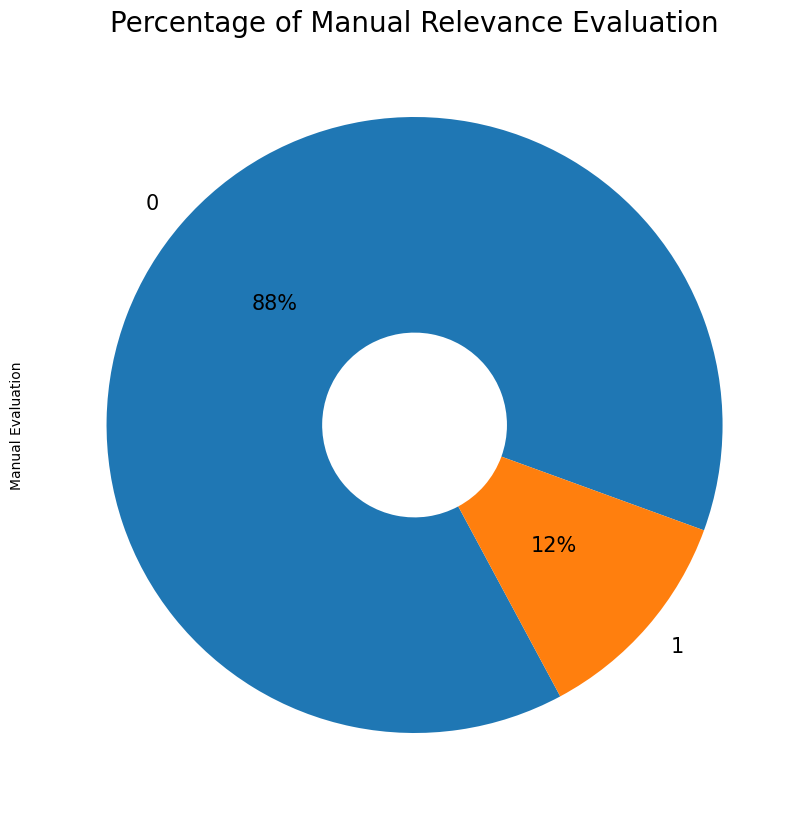

In [53]:
# check the distribution of the labels
plt.figure(figsize=(30,10))
plt.title('Percentage of Manual Relevance Evaluation', fontsize=20)
reddit_global_posts_checked['Manual Evaluation'].value_counts().plot(kind='pie', wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20,  textprops={'fontsize': 15})


<Axes: title={'center': 'Percentage of Model Relevance Evaluation - Unbalanced Model'}, ylabel='RELEVANCE _ UNBALANCED MODEL'>

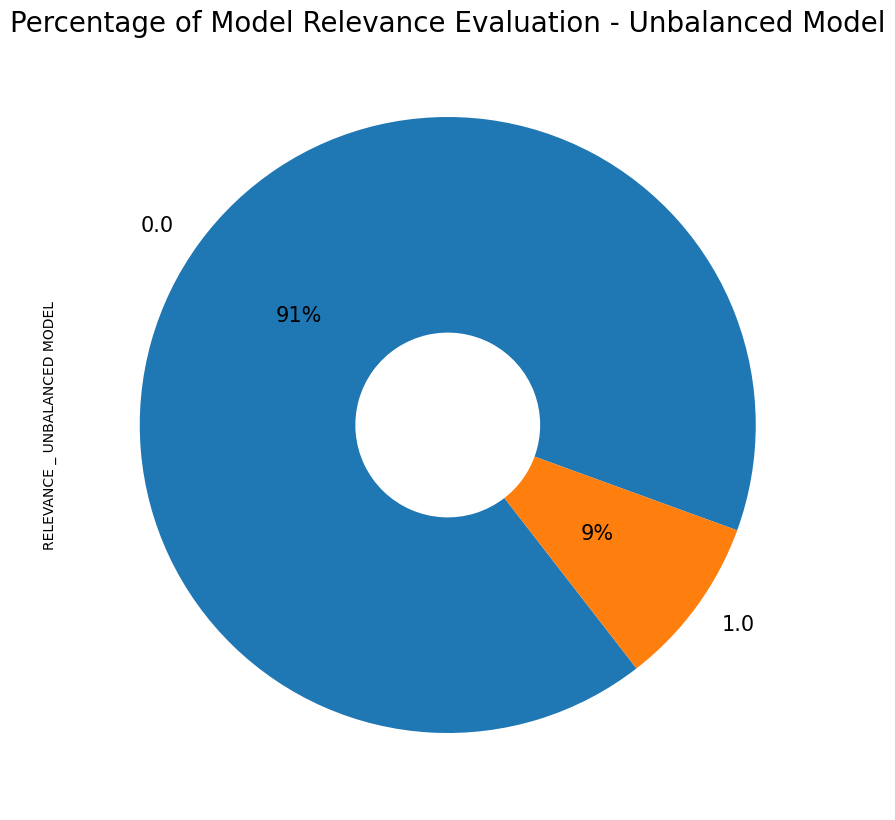

In [54]:
# check the distribution of the labels
plt.figure(figsize=(30,10))
plt.title('Percentage of Model Relevance Evaluation - Unbalanced Model', fontsize=20)
reddit_global_posts_checked['RELEVANCE _ UNBALANCED MODEL'].value_counts().plot(kind='pie', wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20,  textprops={'fontsize': 15})


<Axes: title={'center': 'Percentage of Model Relevance Evaluation - Balanced Model'}, ylabel='RELEVANCE _ BALANCED MODEL'>

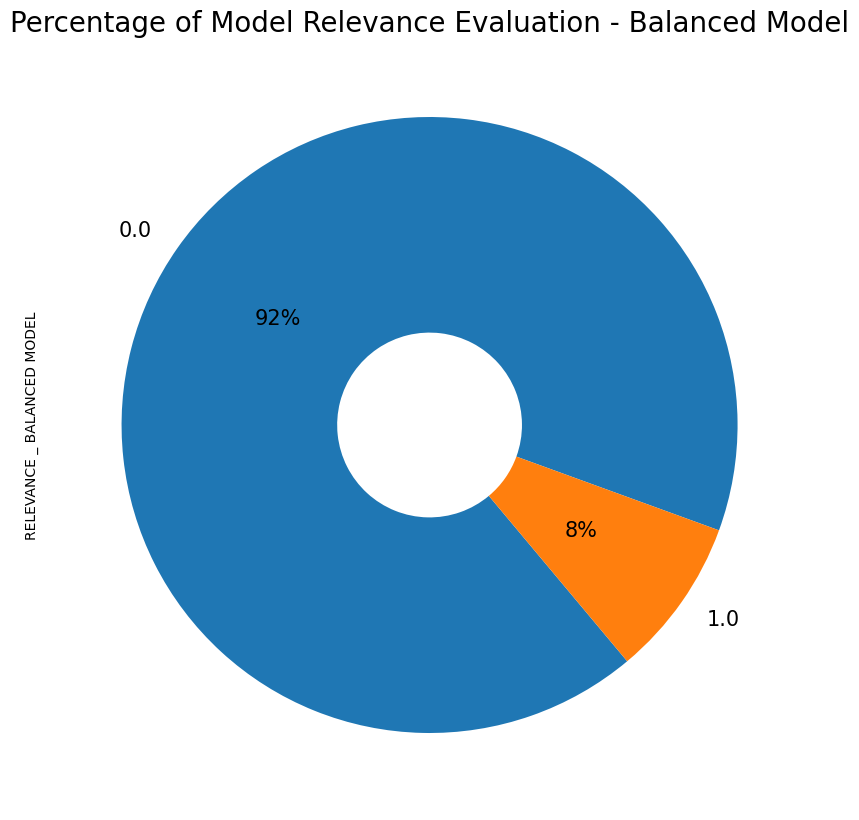

In [55]:
# check the distribution of the labels
plt.figure(figsize=(30,10))
plt.title('Percentage of Model Relevance Evaluation - Balanced Model', fontsize=20)
reddit_global_posts_checked['RELEVANCE _ BALANCED MODEL'].value_counts().plot(kind='pie', wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20,  textprops={'fontsize': 15})


<Axes: title={'center': 'Percentage of Model Relevance Evaluation - First Anastasia Model'}, ylabel='RELEVANCE NIST MODEL'>

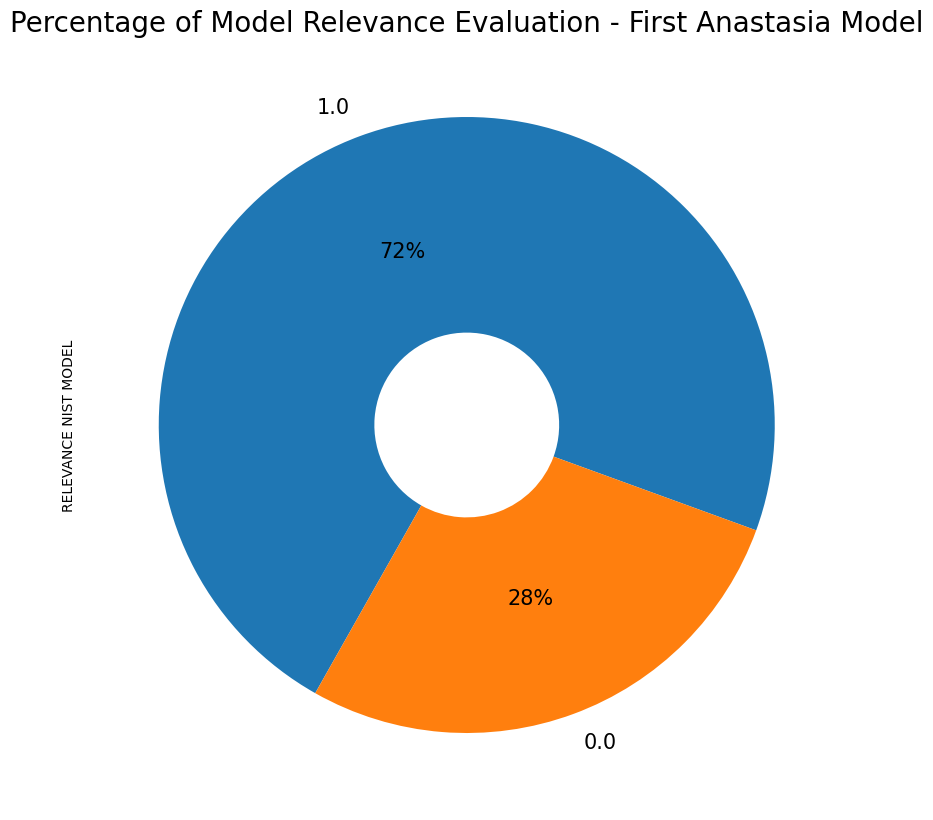

In [56]:
# check the distribution of the labels
plt.figure(figsize=(30,10))
plt.title('Percentage of Model Relevance Evaluation - First Anastasia Model', fontsize=20)
reddit_global_posts_checked['RELEVANCE NIST MODEL'].value_counts().plot(kind='pie', wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20,  textprops={'fontsize': 15})


# UNBALANCED DATASET

In [57]:
df_unbalanced = reddit_global_posts_checked[['Manual Evaluation', 'RELEVANCE _ UNBALANCED MODEL']]

In [58]:
conf_matrix = confusion_matrix(df_unbalanced['Manual Evaluation'], df_unbalanced['RELEVANCE _ UNBALANCED MODEL'])

# Extract values from confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# Display results
print("Confusion Matrix:")
print(conf_matrix)
print("\nFalse Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("\nTrue Positives (TP):", TP)
print("True Negatives (TN):", TN)

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = (2 * precision * recall) / (precision + recall)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")

Confusion Matrix:
[[862  37]
 [ 64  54]]

False Positives (FP): 37
False Negatives (FN): 64

True Positives (TP): 54
True Negatives (TN): 862

Accuracy: 0.9007
Precision: 0.5934
Recall: 0.4576
F1-Score: 0.5167


# BALANCED DATASET

In [59]:
df_balanced = reddit_global_posts_checked[['Manual Evaluation', 'RELEVANCE _ BALANCED MODEL']]

In [60]:
conf_matrix = confusion_matrix(df_balanced['Manual Evaluation'], df_balanced['RELEVANCE _ BALANCED MODEL'])

# Extract values from confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# Display results
print("Confusion Matrix:")
print(conf_matrix)
print("\nFalse Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("\nTrue Positives (TP):", TP)
print("True Negatives (TN):", TN)

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = (2 * precision * recall) / (precision + recall)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")

Confusion Matrix:
[[868  31]
 [ 64  54]]

False Positives (FP): 31
False Negatives (FN): 64

True Positives (TP): 54
True Negatives (TN): 868

Accuracy: 0.9066
Precision: 0.6353
Recall: 0.4576
F1-Score: 0.5320


# ANASTASIA MODEL


In [61]:
df_model = reddit_global_posts_checked[['Manual Evaluation', 'RELEVANCE NIST MODEL']]

In [62]:
conf_matrix = confusion_matrix(df_model['Manual Evaluation'], df_model['RELEVANCE NIST MODEL'])

# Extract values from confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# Display results
print("Confusion Matrix:")
print(conf_matrix)
print("\nFalse Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("\nTrue Positives (TP):", TP)
print("True Negatives (TN):", TN)

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = (2 * precision * recall) / (precision + recall)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")

Confusion Matrix:
[[272 627]
 [  9 109]]

False Positives (FP): 627
False Negatives (FN): 9

True Positives (TP): 109
True Negatives (TN): 272

Accuracy: 0.3746
Precision: 0.1481
Recall: 0.9237
F1-Score: 0.2553
